# Exploratory Data Analysis (EDA) for Telecommunications Sector Analysis
Este notebook contiene un Análisis Exploratorio de Datos (EDA) para evaluar el comportamiento del sector de telecomunicaciones en Argentina. La empresa, cuya actividad principal es brindar acceso a internet, requiere comprender la distribución de accesos, velocidades de conexión, penetración de mercado y tendencias de ingresos. Durante este análisis, examinaremos aspectos clave como valores faltantes, outliers, duplicados y patrones generales mediante visualizaciones.

## Pasos del EDA:
1. **Exploración manual de los datos**
2. **Propuesta de Insights y KPI's**
3. **Análisis de valores faltantes**
4. **Identificación de Outliers**
5. **Detección de registros duplicados**
6. **Generación de Archivos Limpios**
7. **Análisis a partir de gráficos**
8. **Cálculo de KPI's y Recomendaciones Estratégicas para la Empresa**
9. **Conclusiones y Recomendaciones**


## Exploración manual de los datos

Teniendo en cuenta el diccionario de datos y la información de las hojas del Excel, se opta por seleccionar las siguientes hojas y los criterios por los cuales se eligen:

***Velocidad % por prov***: Proporciona la media de velocidad de bajada por provincia, lo cual es esencial para comparar la calidad del servicio en diferentes áreas.

***Penetración-hogares***: Contienen datos sobre el número de accesos por cada 100 hogares, para cada provincia. Esta hoja es fundamental para analizar la penetración y cobertura de internet.

***Totales Accesos Por Tecnología***: Ofrece un resumen de accesos por tecnología a nivel nacional en cada trimestre, ideal para un análisis temporal de la adopción tecnológica en conexiones a internet.

***Totales Accesos por rango y Accesos por rangos***: Muestran el número de accesos en diferentes rangos de velocidad (como hasta 512 kbps, entre 1 Mbps y 6 Mbps, etc.), tanto a nivel total como por provincia, lo que facilita un análisis de la calidad del servicio.

***Ingresos***: Datos sobre ingresos trimestrales por servicios de internet, que permiten relacionar el crecimiento en accesos con el rendimiento financiero.

## Insights globales esperados:

* Identificar regiones y tecnologías prioritarias para inversión.
* Determinar áreas de oportunidad en términos de calidad de servicio (velocidad).
* Evaluar la relación entre penetración y accesos.

## KPI Propuestos

---

### 1. Aumentar en un 2% el acceso al servicio de Internet para el próximo trimestre, cada 100 hogares, por provincia

**Definición del KPI:**
- **Objetivo**: Incrementar los accesos a Internet por cada 100 hogares en un 2% en cada provincia para el próximo trimestre.
- **Fórmula**:  

  $KPI = \left(\frac{\text{Nuevo acceso} - \text{Acceso actual}}{\text{Acceso actual}}\right) \times 100$

- **Variables necesarias**:
  - *Acceso actual*: Accesos por cada 100 hogares en el trimestre actual.
  - *Nuevo acceso*: Proyección del número de accesos por cada 100 hogares tras el incremento del 2%.

**Métrica a entregar**:
- Porcentaje proyectado de incremento para cada provincia.
- Número absoluto de nuevos accesos necesarios para alcanzar el 2%.

**Medible y temporal**:
- Evaluable trimestralmente comparando los datos actuales y proyectados con los resultados reales.

---

### 2. Aumentar un 2% la velocidad promedio de bajada por provincias para el próximo trimestre

**Definición del KPI:**
- **Objetivo**: Incrementar la velocidad promedio de bajada en las provincias en un 2% durante el próximo trimestre.
- **Fórmula**:  

  $KPI = \left(\frac{\text{Nueva velocidad promedio} - \text{Velocidad promedio actual}}{\text{Velocidad promedio actual}}\right) \times 100$

- **Variables necesarias**:
  - *Velocidad promedio actual*: Media de las velocidades actuales por provincia (Mbps).
  - *Nueva velocidad promedio*: Proyección de la velocidad promedio tras el incremento del 2%.

**Métrica a entregar**:
- Porcentaje de incremento en velocidad promedio por provincia para el siguiente trimestre.
- Velocidad promedio proyectada en Mbps.

**Medible y temporal**:
- Evaluable al final del próximo trimestre, midiendo el cambio porcentual en las velocidades promedio.

---

### 3. Incrementar un 1.5% la cobertura de fibra óptica en el siguiente trimestre en todas las provincias

**Definición del KPI:**
- **Objetivo**: Ampliar la cobertura de tecnologías avanzadas en un 1.5% en comparación con el trimestre anterior.
- **Fórmula**:

  $KPI = \left(\frac{\text{Total Accesos proyectados} - \text{Total Accesos actuales}}{\text{Total Accesos actuales}}\right) \times 100$
  
- **Variables necesarias**:
  - *Accesos actuales*: Total de Accesos por tecnologías (Fibra Óptica) en el trimestre actual.
  - *Ingresos proyectados*: Proyección de Accesos por tecnologías (Fibra Óptica) con un incremento del 1.5%.

**Métrica a entregar**:
- Porcentaje proyectado de incremento de accesos.
- Acceso absoluto adicional necesario para alcanzar el 1.5%.

**Medible y temporal**:
- Evaluable trimestralmente comparando los accesos actuales de Fibra Óptica con los del trimestre anterior.



## Análisis de Valores Faltantes
En esta sección se identifican valores faltantes en cada una de las hojas del archivo de Excel que fueron seleccionadas con anterioridad. Los valores faltantes pueden indicar datos no registrados o errores en la recolección de datos y, en algunos casos, requieren imputación o eliminación.
A continuación, evaluaremos la presencia de valores faltantes en cada hoja.

In [19]:
import pandas as pd
import os
import warnings

warnings.filterwarnings("ignore")


# Archivo Excel de origen
archivo_excel = "Internet.xlsx"

# Lista de hojas que queremos extraer
hojas_deseadas = ['Velocidad % por prov', 'Penetracion-hogares', 'Totales Accesos Por Tecnología',
                  'Totales Accesos por rango', 'Accesos por rangos', 'Ingresos']

# Diccionario para almacenar los DataFrames
dataframes = {}

# Directorio para guardar los archivos CSV
output_dir = "Datasets"
os.makedirs(output_dir, exist_ok=True)

# Leer cada hoja del archivo Excel y guardarla como CSV
for hoja in hojas_deseadas:
    try:
        # Leer hoja específica
        dataframes[hoja] = pd.read_excel(archivo_excel, sheet_name=hoja)
        
        # Guardar como CSV
        output_path = os.path.join(output_dir, f"{hoja}.csv")
        dataframes[hoja].to_csv(output_path, index=False, encoding="utf-8-sig")
        
        print(f"Archivo CSV generado para la hoja '{hoja}': {output_path}")
    except Exception as e:
        print(f"No se pudo procesar la hoja '{hoja}'. Error: {e}")

print(f"Todos los archivos procesados y guardados en el directorio '{output_dir}'")


Archivo CSV generado para la hoja 'Velocidad % por prov': Datasets\Velocidad % por prov.csv
Archivo CSV generado para la hoja 'Penetracion-hogares': Datasets\Penetracion-hogares.csv
Archivo CSV generado para la hoja 'Totales Accesos Por Tecnología': Datasets\Totales Accesos Por Tecnología.csv
Archivo CSV generado para la hoja 'Totales Accesos por rango': Datasets\Totales Accesos por rango.csv
Archivo CSV generado para la hoja 'Accesos por rangos': Datasets\Accesos por rangos.csv
Archivo CSV generado para la hoja 'Ingresos': Datasets\Ingresos.csv
Todos los archivos procesados y guardados en el directorio 'Datasets'


Leemos cada uno de los archivos y buscamos valores faltantes

In [20]:
# Iterar sobre cada DataFrame en el diccionario
for nombre, df in dataframes.items():
    # Encontrar columnas con valores nulos
    columnas_con_nulos = df.columns[df.isnull().any()]
    
    if not columnas_con_nulos.empty:
        print(f"DataFrame: {nombre}")
        print("Columnas con valores nulos:")
        for columna in columnas_con_nulos:
            print(f"  {columna}: {df[columna].isnull().sum()} nulos")
        print("-" * 50)
    else:
        print(f"DataFrame: {nombre} no tiene valores nulos.")
        print("-" * 50)

DataFrame: Velocidad % por prov no tiene valores nulos.
--------------------------------------------------
DataFrame: Penetracion-hogares no tiene valores nulos.
--------------------------------------------------
DataFrame: Totales Accesos Por Tecnología no tiene valores nulos.
--------------------------------------------------
DataFrame: Totales Accesos por rango no tiene valores nulos.
--------------------------------------------------
DataFrame: Accesos por rangos
Columnas con valores nulos:
  OTROS: 6 nulos
--------------------------------------------------
DataFrame: Ingresos no tiene valores nulos.
--------------------------------------------------


Teniendo en cuenta los resultados obtenidos con el anterior análisis, se eliminan los valores nulos para el dataframes Accesos por rangos

In [21]:
# Procesar los DataFrames afectados
for nombre, df in dataframes.items():
    if nombre == "Accesos por rangos":
        # Rellenar valores nulos con 0
        df["OTROS"] = df["OTROS"].fillna(0)
        # Eliminar valores negativos
        df = df[df["OTROS"] >= 0]
        dataframes[nombre] = df
        print(f"Valores nulos rellenados y negativos eliminados en {nombre}.")

Valores nulos rellenados y negativos eliminados en Accesos por rangos.


Verificamos que se hayan eliminado los valores nulos

In [22]:
for nombre, df in dataframes.items():
    # Encontrar columnas con valores nulos
    columnas_con_nulos = df.columns[df.isnull().any()]
    
    if not columnas_con_nulos.empty:
        print(f"DataFrame: {nombre}")
        print("Columnas con valores nulos:")
        for columna in columnas_con_nulos:
            print(f"  {columna}: {df[columna].isnull().sum()} nulos")
        print("-" * 50)
    else:
        print(f"DataFrame: {nombre} no tiene valores nulos.")
        print("-" * 50)

DataFrame: Velocidad % por prov no tiene valores nulos.
--------------------------------------------------
DataFrame: Penetracion-hogares no tiene valores nulos.
--------------------------------------------------
DataFrame: Totales Accesos Por Tecnología no tiene valores nulos.
--------------------------------------------------
DataFrame: Totales Accesos por rango no tiene valores nulos.
--------------------------------------------------
DataFrame: Accesos por rangos no tiene valores nulos.
--------------------------------------------------
DataFrame: Ingresos no tiene valores nulos.
--------------------------------------------------


## Detección de Valores Atípicos (Outliers)
Los valores atípicos pueden influir significativamente en las conclusiones del análisis. En esta sección se analizarán los valores extremos en columnas numéricas clave como accesos y velocidades.
En esta sección se determinan los valores atípicos teniendo como referencia los límites superiores e inferiores del primer y tercer cuartil y el intercuartil
Se detectaron valores "Outlier" que no se tratan debido a la naturaleza de los datos

In [23]:
import numpy as np

# Función para identificar valores atípicos usando el rango intercuartílico (IQR)
def detectar_outliers(df, columnas):
    outliers = {}
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)  # Primer cuartil
        Q3 = df[columna].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior
        
        # Filtrar valores fuera de los límites
        outlier_indices = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)].index
        outliers[columna] = outlier_indices.tolist()
    return outliers

# Identificar valores atípicos en cada DataFrame del diccionario
for nombre, df in dataframes.items():
    columnas_numericas = df.select_dtypes(include=[np.number]).columns  # Seleccionar columnas numéricas
    if not columnas_numericas.empty:
        print(f"DataFrame: {nombre}")
        outliers = detectar_outliers(df, columnas_numericas)
        for columna, indices in outliers.items():
            if indices:
                print(f"  Columna: {columna}, Valores atípicos en índices: {indices}")
        print("-" * 50)


DataFrame: Velocidad % por prov
  Columna: Mbps (Media de bajada), Valores atípicos en índices: [0, 1, 2, 3, 5, 6, 7, 8, 13, 14, 15, 16, 18, 20, 23, 24, 25, 26, 27, 29, 30, 31, 32, 37, 38, 39, 40, 42, 44, 47, 48, 49, 50, 51, 53, 54, 55, 56, 61, 62, 63, 64, 66, 68, 71, 72, 73, 74, 75, 77, 78, 79, 80, 85, 86, 87, 88, 90, 92, 95, 96, 97, 98, 99, 101, 102, 103, 104, 109, 110, 111, 112, 114, 116, 119, 120, 121, 122, 123, 125, 126, 127, 128, 133, 134, 135, 136, 140, 143, 144, 145, 146, 147, 149, 150, 151, 152, 157, 158, 159, 160, 164, 167, 168, 169, 193, 217, 241, 265, 289, 313]
--------------------------------------------------
DataFrame: Penetracion-hogares
  Columna: Accesos por cada 100 hogares, Valores atípicos en índices: [25, 49, 121, 145, 169, 193, 625, 649, 673, 721, 745, 769, 817, 841]
--------------------------------------------------
DataFrame: Totales Accesos Por Tecnología
--------------------------------------------------
DataFrame: Totales Accesos por rango
  Columna: Hasta 5

Entre los valores de ingresos podemos encontrar un año que está incorrecto, este sería el 2033

In [24]:
dataframes['Ingresos']
# Cambiar el año solo para la fila específica donde "Año" es 2033
dataframes['Ingresos'].loc[dataframes['Ingresos']['Año'] == 2033, 'Año'] = 2023


## Detección de Registros Duplicados
La existencia de registros duplicados puede distorsionar el análisis, especialmente al calcular totales o promedios. Revisaremos cada hoja para verificar si hay filas duplicadas.


In [25]:
# Iterar sobre cada DataFrame en el diccionario para identificar duplicados
for nombre, df in dataframes.items():
    # Verificar si hay duplicados
    duplicados = df.duplicated().sum()
    if duplicados > 0:
        print(f"DataFrame: {nombre} tiene {duplicados} filas duplicadas.")
    else:
        print(f"DataFrame: {nombre} no tiene filas duplicadas.")

DataFrame: Velocidad % por prov no tiene filas duplicadas.
DataFrame: Penetracion-hogares no tiene filas duplicadas.
DataFrame: Totales Accesos Por Tecnología no tiene filas duplicadas.
DataFrame: Totales Accesos por rango no tiene filas duplicadas.
DataFrame: Accesos por rangos no tiene filas duplicadas.
DataFrame: Ingresos no tiene filas duplicadas.


## Generación de Archivos Limpios
Se generan los archivos limpios con el fin de utilizarlos en el dashboard

In [26]:
import os

# Directorio para guardar los archivos CSV
output_dir = "Data_cleaned"
os.makedirs(output_dir, exist_ok=True)

# Guardar cada DataFrame como CSV
for nombre, df in dataframes.items():
    output_path = os.path.join(output_dir, f"{nombre}.csv")
    df.to_csv(output_path, index=False, encoding="utf-8-sig")  # Exportar con codificación UTF-8
    print(f"Archivo guardado: {output_path}")

print(f"Todos los archivos han sido guardados en la carpeta: {output_dir}")

Archivo guardado: Data_cleaned\Velocidad % por prov.csv
Archivo guardado: Data_cleaned\Penetracion-hogares.csv
Archivo guardado: Data_cleaned\Totales Accesos Por Tecnología.csv
Archivo guardado: Data_cleaned\Totales Accesos por rango.csv
Archivo guardado: Data_cleaned\Accesos por rangos.csv
Archivo guardado: Data_cleaned\Ingresos.csv
Todos los archivos han sido guardados en la carpeta: Data_cleaned


## Análisis gráfico

Se plantean gráficos pertienentes debido a que es fundamental en el análisis de datos porque facilita la comprensión, interpretación y comunicación de la información.
El análisis gráfico no solo es una herramienta analítica, sino también una herramienta de comunicación. Facilita la toma de decisiones basada en datos y asegura que la información clave sea accesible y comprensible para todos los interesados ofrenciendo:
* Facilitar la comprensión
* Identificar patrones y tendencias
* Resaltar anomalías
* Mejora en la toma de decisiones
* Comunicación efectiva
* Comparaciones claras
* Reducción de sesgos en la interpretación

**Nota para el lector**: se suben las imágenes de los gráficos debido a que no se muestran al momento de subir el repositorio, sin embargo son las obtenidas al ejecutar el código del notebook

In [27]:
df_accesos_por_rangos = dataframes["Accesos por rangos"]

# Asegúrate de limpiar los nombres de las columnas
df_accesos_por_rangos.columns = df_accesos_por_rangos.columns.str.strip()

## Distribución de Accesos Totales para cada provincia, trimestre y año

El gráfico refleja un mercado con un crecimiento constante y sostenido en los accesos totales por trimestre en Buenos Aires durante el año 2022. La estabilidad trimestral y el ligero crecimiento sugieren una adopción progresiva de los servicios de acceso a internet. Este tipo de comportamiento puede ser útil para planificar estrategias comerciales o evaluar la capacidad de infraestructura en la región.

In [28]:
from graficos import AccesosPorRangosPlot

accesos_plot = AccesosPorRangosPlot(dataframes["Accesos por rangos"])
accesos_plot.display()

![imagen](src/dist_acc_tot_trim_buen_2022.png)

## Distribución de Accesos por Rangos de Velocidades según año y trimestre

El gráfico refleja un mercado de internet en transición hacia velocidades más altas, con una concentración masiva en conexiones superiores a 30 Mbps, lo que podría estar asociado al despliegue de tecnologías avanzadas como fibra óptica en la región. Las velocidades más bajas están quedando obsoletas, y su participación disminuye rápidamente.

Este comportamiento también sugiere que los proveedores de internet deben continuar invirtiendo en infraestructura de alta velocidad para mantenerse competitivos en el mercado.

In [29]:
from graficos import DistribucionAccesos

distribucion_accesos = DistribucionAccesos(dataframes["Accesos por rangos"])
distribucion_accesos.display()

![imagen](src/dist_acc_vel_trim_buen_2022.png)

## Total Accesos por Velocidad según año y trimestre

El gráfico refleja una clara tendencia hacia velocidades superiores a 30 Mbps, lo que indica un mercado que prioriza conexiones rápidas para satisfacer las demandas modernas.
Las velocidades bajas están casi extintas, y las conexiones de rangos intermedios (1 Mbps - 20 Mbps) podrían estar en transición hacia velocidades superiores.
Este escenario también resalta el impacto de las inversiones en infraestructura (principalmente fibra óptica y cablemodem) y la obsolescencia de tecnologías tradicionales.

In [30]:
from graficos import TotalAccesosPorRango

grafico_accesos = TotalAccesosPorRango(dataframes["Totales Accesos por rango"])
grafico_accesos.display()

![imagen](src/dist_acc_vel_rang_2024.png)

## Distribución de Accesos por tecnología según el año y trimestre

Cablemodem y Fibra óptica dominan el mercado de accesos a internet, lo que refleja una madurez tecnológica en la infraestructura de red.
ADSL está quedando obsoleto, mientras que Wireless y "Otros" tienen participación residual, probablemente en mercados específicos o regiones con limitaciones tecnológicas.
Es probable que en los próximos años la fibra óptica supere a Cablemodem en participación, impulsada por su capacidad de satisfacer las crecientes demandas de velocidad y confiabilidad.

In [31]:
from graficos import GraficoAccesosPorTecnologia

grafico_tecnologia = GraficoAccesosPorTecnologia(dataframes["Totales Accesos Por Tecnología"])
grafico_tecnologia.display()

![imagen](src/dist_acc_tecn_2024.png)

## Penetración de Accesos por cada 100 hogares

La penetración de accesos por cada 100 hogares muestra una tendencia creciente y sostenida durante todos los trimestres del año.

* Trimestre 1: ~86 accesos por cada 100 hogares.

* Trimestre 4: ~89 accesos por cada 100 hogares.

Este crecimiento refleja un incremento continuo en la adopción de servicios de internet en la región. Sin embargo, aunque el crecimiento es constante, los incrementos son relativamente pequeños entre trimestres, lo que indica:

* Una maduración del mercado donde la mayoría de los hogares ya tiene acceso.

* Incrementos principalmente debido a:

    * Nuevos hogares que contratan servicios.

    * Actualizaciones tecnológicas o mejoras en el servicio.

* La penetración, que está por encima del 85% en todos los trimestres, sugiere que la mayoría de los hogares en Córdoba tienen acceso a servicios de internet. Esto posiciona a la provincia en un nivel de alta conectividad residencial, lo que es un indicador positivo para el desarrollo tecnológico y digital de la región.

In [32]:
from graficos import GraficoPenetracionHogares

grafico_penetracion = GraficoPenetracionHogares(dataframes["Penetracion-hogares"])
grafico_penetracion.display()

![imagen](src/pen_hog_cord_2022.png)

## Velocidad Promedio por Provincia

Capital Federal experimentó un incremento importante en la velocidad promedio durante 2022, alcanzando niveles muy altos al cierre del año (~180 Mbps).
Este comportamiento sugiere que la región está bien posicionada en términos de conectividad, con un mercado competitivo que impulsa mejoras continuas en la infraestructura.

In [33]:
from graficos import GraficoVelocidadPromedio

grafico_velocidad = GraficoVelocidadPromedio(dataframes["Velocidad % por prov"])
grafico_velocidad.display()

![imagen](src/vel_prom_cap_fed_2022.png)

## Comportamiento anual de los ingresos ajustados por inflación desde el 2014 hasta el 2023

Los ingresos ajustados por inflación muestran un crecimiento sostenido a largo plazo, aunque con ciertas fluctuaciones intermedias, especialmente entre 2016 y 2018.

Los años recientes, especialmente 2022 y 2023, destacan por registrar los ingresos ajustados más altos, lo que refleja un mercado más dinámico, posiblemente relacionado con un mayor consumo y digitalización.

In [34]:
from graficos import IngresosInflacion


df_inflacion = pd.read_csv('Data_cleaned/Inflacion_Anual_Argentina_2014_2024.csv')
ingresos_grafico = IngresosInflacion(dataframes['Ingresos'], df_inflacion)
ingresos_grafico.display()

![imagen](src/evol_ingr.png)

## Cálculo de KPI's y Recomendaciones Estratégicas para la Empresa

### Oportunidades Detectadas y Recomendaciones

#### 1. **Expandir la Penetración del Servicio de Internet**
   - **Oportunidad:** Provincias como **La Rioja** y otras con crecimiento negativo o limitado en el KPI de penetración representan una oportunidad para captar nuevos clientes. El incremento en la cobertura de Internet en estas áreas podría generar una base de usuarios fidelizados a largo plazo.
   - **Estrategia de Inversión:** Invertir en infraestructura para mejorar el acceso en regiones con menor penetración y ofrecer paquetes promocionales que incentiven la adopción del servicio.
   - **Posible Ganancia:** Ampliar el mercado objetivo y aumentar los ingresos recurrentes al posicionarse como líderes en regiones desatendidas.

---

#### 2. **Acelerar la Adopción de Velocidades Altas**
   - **Oportunidad:** Provincias como **Buenos Aires** y **Capital Federal** están experimentando un crecimiento constante en la velocidad promedio de bajada, lo que indica una alta demanda por velocidades más rápidas.
   - **Estrategia de Inversión:** 
     - Desarrollar productos premium con velocidades superiores que incluyan beneficios adicionales como servicios OTT (Over-The-Top).
     - En provincias rezagadas, ofrecer soluciones escalables para actualizar velocidades a un costo competitivo.
   - **Posible Ganancia:** Captar usuarios de alta rentabilidad mediante planes premium y consolidar la base de usuarios en regiones con una demanda creciente.

---

#### 3. **Ampliar la Cobertura de Fibra Óptica**
   - **Oportunidad:** El KPI muestra que la fibra óptica está en una etapa de crecimiento acelerado, pero su adopción no es uniforme en todas las provincias. Esto abre la puerta para convertirse en el principal proveedor de esta tecnología en regiones menos desarrolladas.
   - **Estrategia de Inversión:**
     - Establecer asociaciones público-privadas para reducir costos de instalación en provincias con baja penetración de fibra.
     - Promover ofertas iniciales agresivas para captar clientes en el corto plazo y fidelizarlos con contratos a largo plazo.
   - **Posible Ganancia:** Incrementar los ingresos a través de la adopción de fibra, una tecnología que garantiza mayores márgenes de rentabilidad por cliente debido a su estabilidad y capacidad.

---

#### 4. **Fidelización y Diversificación de Servicios**
   - **Oportunidad:** Aprovechar el crecimiento detectado en provincias líderes como **Buenos Aires** para implementar estrategias de fidelización mediante servicios adicionales como TV digital, IoT (Internet of Things), y soluciones de ciberseguridad.
   - **Estrategia de Inversión:**
     - Introducir bundles de servicios (Internet + TV + IoT) para maximizar el ingreso por cliente.
     - Explorar oportunidades en sectores industriales y comerciales que requieran conexiones de alta velocidad.
   - **Posible Ganancia:** Incremento de ingresos promedio por cliente (ARPU, por sus siglas en inglés) y diversificación de fuentes de ingresos.

---

### Conclusión
El análisis de los KPI demuestra que las provincias con menor penetración, menor velocidad promedio y menor cobertura de fibra óptica ofrecen grandes oportunidades de inversión con un potencial de alta rentabilidad. Para maximizar las ganancias, se recomienda una estrategia focalizada en:
- Expandir infraestructura en regiones menos desarrolladas.
- Promover la adopción de tecnologías avanzadas como la fibra óptica.
- Capitalizar en el incremento de la demanda por velocidades altas mediante la creación de productos premium.

Al priorizar estas áreas estratégicas, la empresa puede consolidar su posición como líder del mercado y asegurar un crecimiento sostenible en ingresos.

In [35]:
from KPIs import KPIAnalyzer

In [ ]:
# Crear instancia para los KPI
kpi_analyzer = KPIAnalyzer(
    dataframes['Penetracion-hogares'],
    dataframes['Velocidad % por prov'],
    dataframes['Totales Accesos Por Tecnología']
)

# Mostrar los KPI interactivos
kpi_analyzer.display()


![KPI - pen_prov_cap_fed_2023.png](<attachment:KPI - pen_prov_cap_fed_2023.png>)
![KPI - pen_prov_buen_air_2023.png](<attachment:KPI - pen_prov_buen_air_2023.png>)
![KPI - pen_prov_cordr_2023.png](<attachment:KPI - pen_prov_cordr_2023.png>)
![KPI - vel_prom_buen_air.png](<attachment:KPI - vel_prom_buen_air.png>)
![KPI - vel_prom_cord_2023.png](<attachment:KPI - vel_prom_cord_2023.png>)
![KPI - vel_prom_rioja_2022.png](<attachment:KPI - vel_prom_rioja_2022.png>)
![KPI - fibOpt_2023.png](<attachment:KPI - fibOpt_2023.png>)
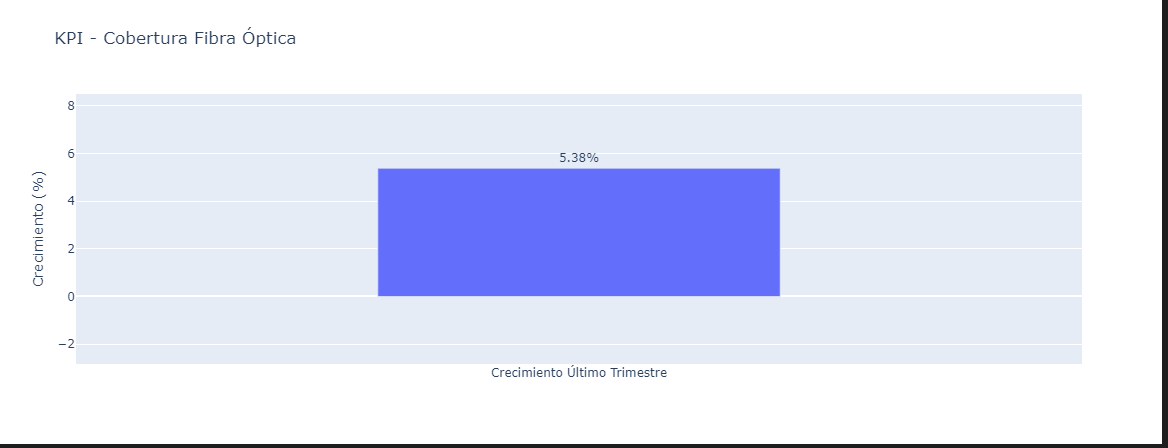
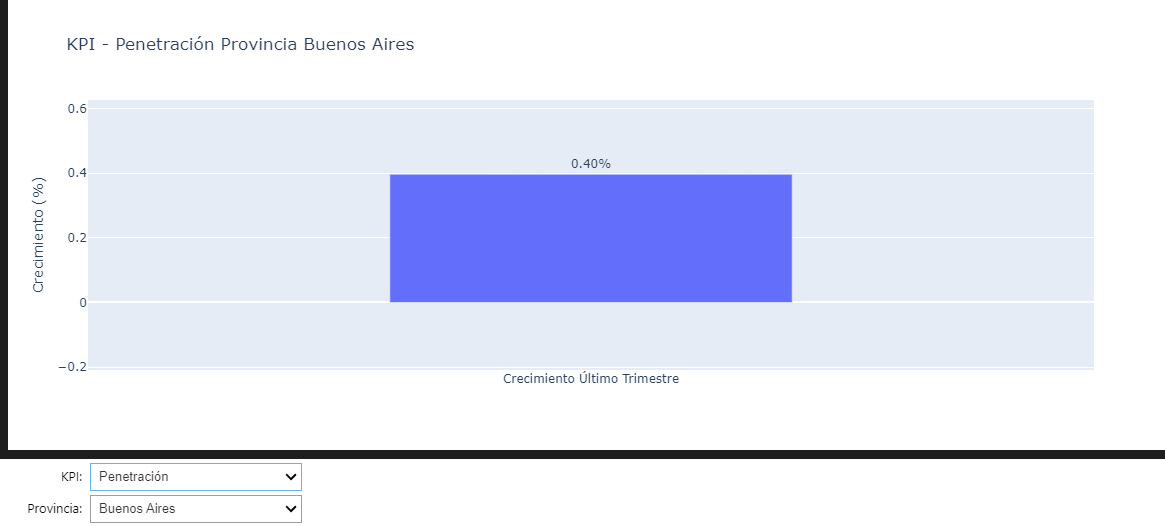
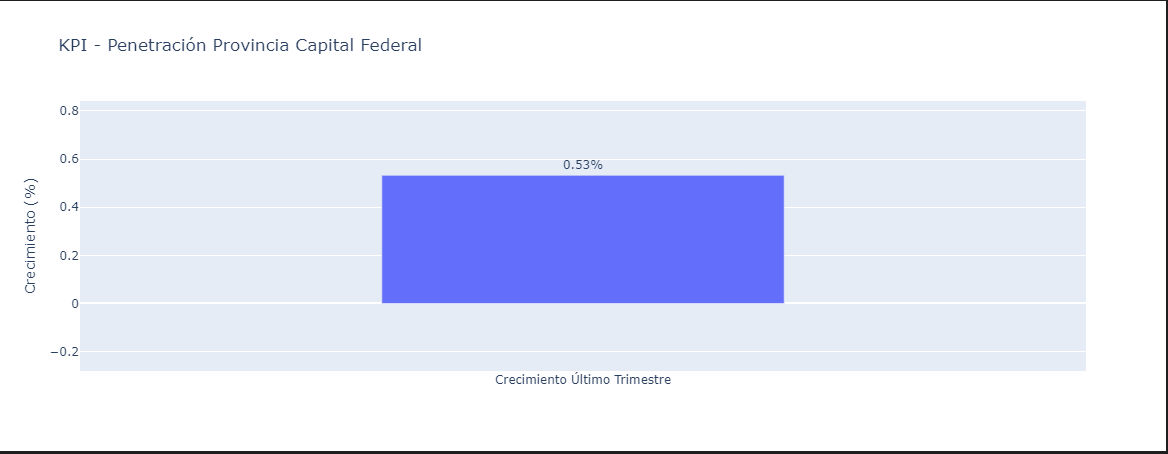
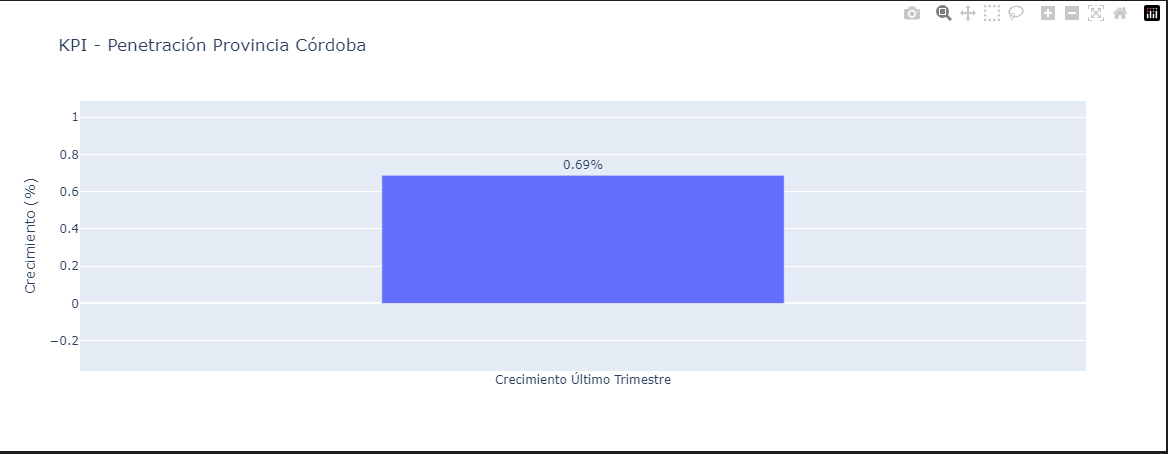
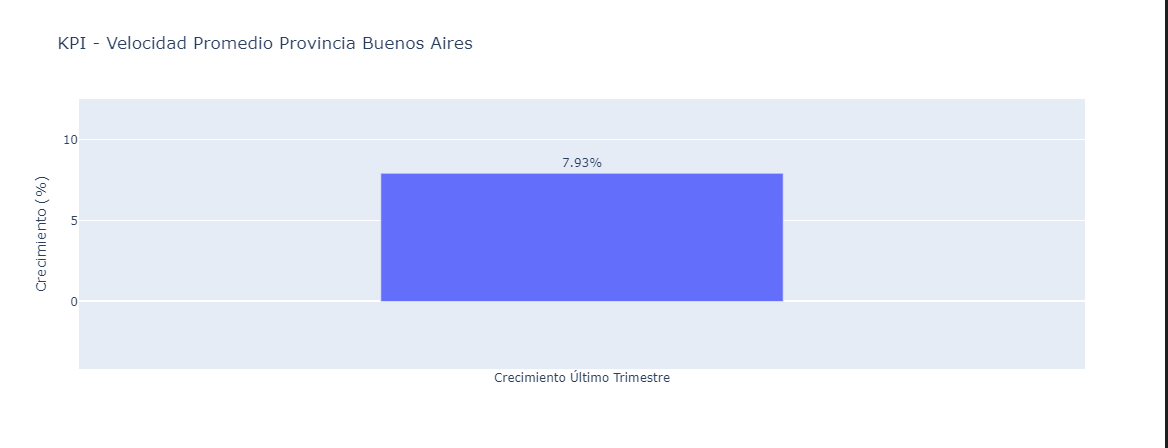
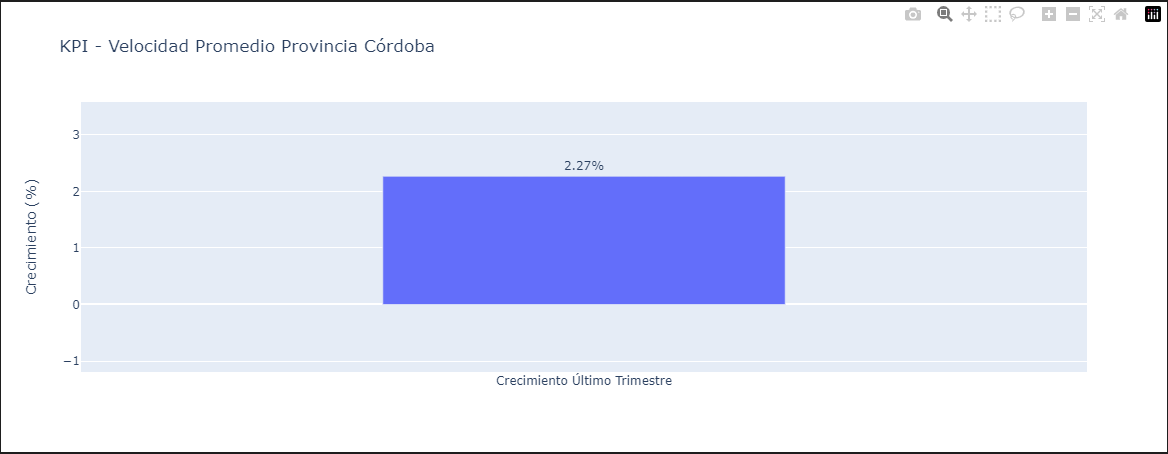
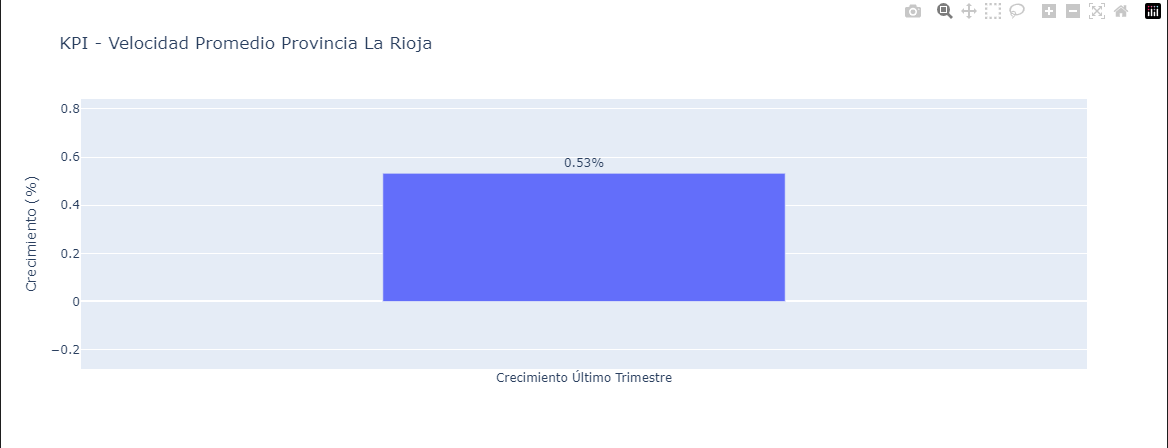

## Conclusiones y Recomendaciones Generales Basadas en los Gráficos

### Conclusiones Generales
Basándonos en el análisis de los gráficos relacionados con distribución de velocidades, tecnologías, penetración de internet, ingresos ajustados y velocidad promedio, se pueden extraer las siguientes conclusiones generales:

---

#### 1. **Preferencia por velocidades superiores**
- La mayoría de los accesos están concentrados en velocidades superiores a **30 Mbps**, mientras que las categorías de velocidad bajas (<1 Mbps) están prácticamente obsoletas.
- Esto indica una transición hacia servicios de mayor capacidad, alineados con las crecientes necesidades de consumo digital (streaming, videojuegos, teletrabajo).

#### 2. **Dominio de Cablemodem y Fibra Óptica**
- **Cablemodem** lidera en términos de accesos, pero **fibra óptica** muestra un crecimiento acelerado, indicando su importancia estratégica como la tecnología del futuro.
- Alternativas como ADSL y Wireless están quedando rezagadas, reflejando una evolución natural hacia tecnologías más avanzadas.

#### 3. **Crecimiento constante en la penetración de internet**
- Provincias como Córdoba muestran una penetración cercana al **90% de hogares**, mientras que otras provincias tienen un crecimiento más moderado o incluso negativo.
- Esto resalta una **oportunidad significativa para mejorar la conectividad** en áreas con menor adopción.

#### 4. **Incremento sostenido de ingresos**
- Los ingresos ajustados por inflación han crecido significativamente desde 2014, con un fuerte repunte en los últimos años (2022-2023), lo que refleja una expansión real en términos económicos.
- Este crecimiento indica que el sector sigue siendo rentable incluso en contextos de alta inflación.

#### 5. **Incremento en velocidad promedio**
- Las velocidades promedio han aumentado considerablemente en regiones clave como Capital Federal, alcanzando hasta **180 Mbps**. Esto refleja mejoras continuas en la infraestructura de red y una demanda activa por mejores servicios.

---

### Recomendaciones Generales

---

#### 1. **Enfocarse en fibra óptica como tecnología prioritaria**
- **Ampliar la cobertura de fibra óptica**, particularmente en regiones con menor adopción, como áreas rurales o suburbanas.
- Ofrecer incentivos a usuarios de tecnologías rezagadas (ADSL, Wireless) para que migren a fibra óptica, mejorando tanto la calidad como la rentabilidad.

---

#### 2. **Expandir conectividad en regiones con baja penetración**
- Provincias con crecimiento negativo o limitado en la penetración de internet (por ejemplo, La Rioja) deben ser prioridad para nuevas inversiones.
- Diseñar **planes de expansión de cobertura** apoyados por subsidios o asociaciones público-privadas para captar nuevos usuarios.

---

#### 3. **Optimizar la oferta de velocidades altas**
- Aprovechar la demanda por velocidades superiores a **30 Mbps** ofreciendo planes premium con servicios adicionales como contenido OTT o paquetes de gaming.
- Implementar programas escalonados que permitan a los usuarios aumentar gradualmente su velocidad a precios competitivos.

---

#### 4. **Incentivar la adopción de tecnologías avanzadas**
- Crear campañas promocionales que destaquen las ventajas de Cablemodem y fibra óptica sobre ADSL y Wireless, enfocándose en la calidad y estabilidad de las conexiones.
- Establecer asociaciones con empresas locales para acelerar la implementación de estas tecnologías en áreas de difícil acceso.

---

#### 5. **Continuar el monitoreo de ingresos e infraestructura**
- Usar el análisis de ingresos ajustados para identificar áreas de mayor rentabilidad y priorizar inversiones estratégicas en esas regiones.
- Realizar estudios periódicos de la infraestructura tecnológica para garantizar que las mejoras se mantengan alineadas con las tendencias del mercado.

---

### Perspectiva para Inversionistas
Estas recomendaciones estratégicas apuntan a maximizar las oportunidades en un sector en crecimiento constante. La combinación de infraestructura tecnológica avanzada, estrategias de fidelización, y una expansión sostenible puede generar retornos significativos para las empresas que decidan invertir en este mercado.
